<a href="https://colab.research.google.com/github/jacobiancosine/jacobiancosine/blob/main/Capstone_2023_beta%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
#loading up everything that is needed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr


In [2]:
#access personal drive for data.
#uncommit next two lines when working in collab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#turn csv into dataframe

games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')

#local file
#games = pd.read_csv('games.csv')

In [4]:
#Checking load

games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# EDA

In [5]:
games.describe()


,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.858100e+04,78581.000000,78581.000000,78581.000000,78581.000000,78581.000000,78581.000000,7.858100e+04,78581.000000,44.000000,78581.000000,7.858100e+04,78581.000000,78581.000000,78581.000000,78581.000000
mean,1.266629e+06,138.883051,0.329253,7.104333,0.573625,3.591861,0.043127,1.028846e+03,170.194653,98.909091,20.723165,8.295522e+02,112.196409,11.210954,99.838765,12.011020
std,6.402733e+05,5577.198496,2.311860,11.049926,14.268964,15.938915,1.863819,2.534235e+04,4755.704133,0.857747,178.311718,1.861140e+04,1187.518506,195.629768,1571.243342,212.201878
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.315100e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.239050e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,8.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.791680e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.200000e+01,16.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.546410e+06,872138.000000,21.000000,999.000000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [6]:
# # checking for dupes

games.duplicated().sum()

0

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   About the game              75646 non-null  object 
 9   Supported languages         78581 non-null  object 
 10  Full audio languages        78581 non-null  object 
 11  Reviews                     9518 non-null   object 
 12  Header image                78581 non-null  object 
 13  Website                     375

In [8]:
# checking for nulls
games.isnull().sum().sort_values()

AppID                             0
Median playtime two weeks         0
Median playtime forever           0
Average playtime two weeks        0
Average playtime forever          0
Recommendations                   0
Achievements                      0
Negative                          0
Positive                          0
User score                        0
Linux                             0
Mac                               0
Windows                           0
Metacritic score                  0
Required age                      0
Header image                      0
Full audio languages              0
Supported languages               0
DLC count                         0
Price                             0
Release date                      0
Peak CCU                          0
Estimated owners                  0
Name                              6
Screenshots                    1640
Genres                         2926
About the game                 2935
Developers                  

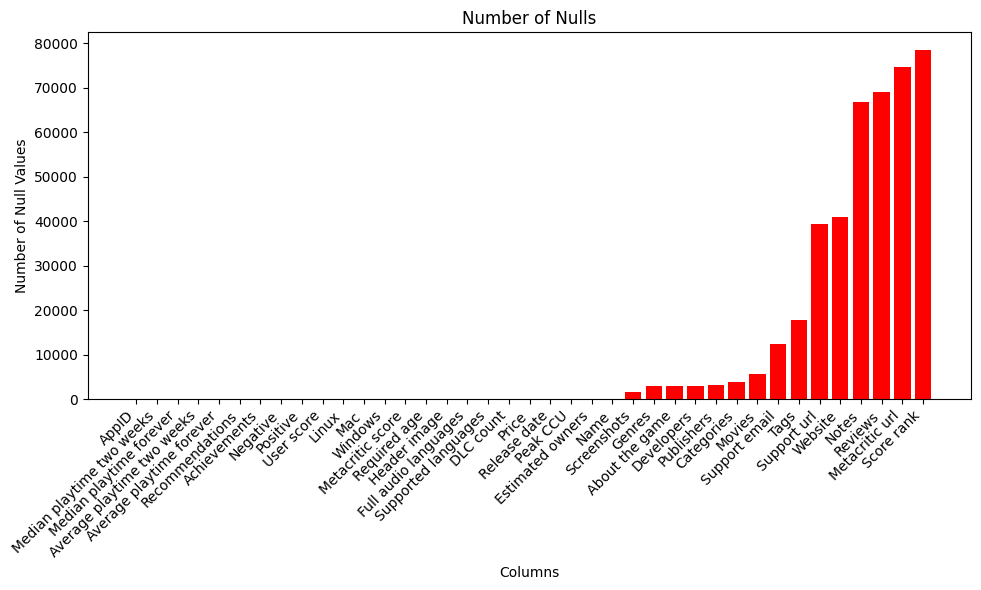

In [9]:
#display nulls as a graph
%matplotlib inline

null_counts = games.isnull().sum().sort_values() # sort values in ascending order


plt.figure(figsize=(10,6))
plt.bar(null_counts.index, null_counts.values, color = 'red')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Nulls')
plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
plt.tight_layout()
plt.show()

**Columns to keep for sure even though we have some nulls:**

*   Genres
*   Developers
*   Publishers
*   Tags

**Columns to review for dropping:**

*   Screenshots
*   About the Game
*   Movies
*   Support Emails
*   Support url
*   Website
*   Notes
*   Review
*   Metacritic url
*   Scorerank



In [10]:
#let's look at the nulls a little be closer

null_threshold = 6

columns_nulls = games.columns[games.isnull().sum() > null_threshold].tolist()

#need to be careful. It looks like 'Genre', 'Categories' and 'Tags' are needed.

In [11]:
#columns to be reviewed.
columns_nulls

['About the game',
 'Reviews',
 'Website',
 'Support url',
 'Support email',
 'Metacritic url',
 'Score rank',
 'Notes',
 'Developers',
 'Publishers',
 'Categories',
 'Genres',
 'Tags',
 'Screenshots',
 'Movies']

In [12]:
# can drop. Might be interesting to do an analysis on this word bubble in a different analysis
games['About the game'].unique

<bound method Series.unique of 0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
2        Jolt Project: The army now has a new robotics ...
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
                               ...                        
78576    Welcome to Desert Spirit Grave (DSG), an immer...
78577    On our Steam discussion boards you will find m...
78578    Протяжный скрип старых лагерных ворот эхом раз...
78579    A treacherous visual novel about friendship, d...
78580    Kayra's nightmare has come true! The evil, lef...
Name: About the game, Length: 78581, dtype: object>

In [13]:
# can drop
games['Screenshots'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_3f370f69eef0caeceb533d06925cc48f0f26c83c.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_3fcd62a2831bcc1e557a0fe2a061b6369ba030d1.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_06a2446b7ccef5eaac1ef4200acdb3f02dac9ae0.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_794a3ecd4ae51313f8cfffbc6b3d8b91c665b12b.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_8907e0a624a1113be01fa1b426d0e3ab0971e7d2.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_191adc1f11bf9d13498cb411ac71f29221732e86.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_04b30aaa0ce083b1bcff63d06432707ab9c35c74.1920x1080.jpg?t=1644931091,https://cdn.akamai.steamstatic.com/steam/apps/750920/ss_7496de2518ddb1b58db0004d1386b4e48c442367.1920x1080.jpg?t=1644931091,https://

In [14]:
# can drop
games['Support email'].value_counts()

info@bigfishgames.com                             325
mikhail.zverev@8floor.net                         268
business@atomicfabrik.com                         186
contact@exosyphenstudios.com                      153
support@quanticlab.com                            148
                                                 ... 
support@systemic-games.com                          1
info@primegames.bg                                  1
info@escaperealityuk.space                          1
support-deathcollector-steam@choiceofgames.com      1
witchcraftvidgame@gmail.com                         1
Name: Support email, Length: 39022, dtype: int64

In [15]:
# can drop
games['Score rank'].value_counts()


99.0     18
98.0     12
100.0    12
97.0      2
Name: Score rank, dtype: int64

In [16]:
# can drop
games['Notes'].value_counts()

This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                                        106
Nakedness. All characters appearing in this game are over 18 years of age.                                                                                                                                                          101
-Nudity or sexual content -Not suitable for watching at work -Not suitable for all ages -All characters in the game are over 18 years old                                                                                            57
This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Nudity or Sexual Content, General Mature Content                                                                          42
This game contains the following sexual content ・Strong language ・Sexual

## Columns that will be dropped.

* 'About the game'
* 'Reviews'
* 'Website'
* 'Support url'
* 'Support email'
* 'Metacritic url'
* 'Score rank'
* 'Notes'
* 'Screenshots'
* 'Movies'

In [17]:
#columns that would be need to be dropped.
drop_me =  ['About the game', 'Reviews', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Screenshots', 'Movies']

In [18]:
#dropping unneccessary columns
games = games.drop(columns = drop_me)

In [19]:
#checking dropped Columns
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78581 entries, 0 to 78580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       78581 non-null  int64  
 1   Name                        78575 non-null  object 
 2   Release date                78581 non-null  object 
 3   Estimated owners            78581 non-null  object 
 4   Peak CCU                    78581 non-null  int64  
 5   Required age                78581 non-null  int64  
 6   Price                       78581 non-null  float64
 7   DLC count                   78581 non-null  int64  
 8   Supported languages         78581 non-null  object 
 9   Full audio languages        78581 non-null  object 
 10  Header image                78581 non-null  object 
 11  Windows                     78581 non-null  bool   
 12  Mac                         78581 non-null  bool   
 13  Linux                       785

In [20]:
# can drop
games['Header image'].value_counts()

https://cdn.akamai.steamstatic.com/steam/apps/750920/header.jpg?t=1644931091     20
https://cdn.akamai.steamstatic.com/steam/apps/24010/header.jpg?t=1658409119       5
https://cdn.akamai.steamstatic.com/steam/apps/359550/header.jpg?t=1655223333      5
https://cdn.akamai.steamstatic.com/steam/apps/37960/header.jpg?t=1447352428       4
https://cdn.akamai.steamstatic.com/steam/apps/18430/header.jpg?t=1447351615       3
                                                                                 ..
https://cdn.akamai.steamstatic.com/steam/apps/1971510/header.jpg?t=1650969228     1
https://cdn.akamai.steamstatic.com/steam/apps/1020360/header.jpg?t=1587457888     1
https://cdn.akamai.steamstatic.com/steam/apps/20710/header.jpg?t=1499419184       1
https://cdn.akamai.steamstatic.com/steam/apps/1423610/header.jpg?t=1637609296     1
https://cdn.akamai.steamstatic.com/steam/apps/1745050/header.jpg?t=1693521116     1
Name: Header image, Length: 78475, dtype: int64

In [21]:
# can drop
games['Full audio languages'].value_counts()

[]                                                                                                                                                                     45465
['English']                                                                                                                                                            18522
['English', 'Russian']                                                                                                                                                  1235
['English', 'Simplified Chinese']                                                                                                                                       1075
['Simplified Chinese']                                                                                                                                                   878
                                                                                                                                       

In [22]:
# can drop
games['DLC count'].value_counts()

0       67239
1        7267
2        1794
3         685
4         381
        ...  
87          1
114         1
149         1
260         1
1968        1
Name: DLC count, Length: 94, dtype: int64

In [23]:
#can drop? keep
games['Achievements'].value_counts()

0       39551
10       1967
12       1537
20       1401
15       1288
        ...  
1337        1
219         1
1043        1
764         1
412         1
Name: Achievements, Length: 429, dtype: int64

In [24]:
#can drop
games['Recommendations'].value_counts()

0        65213
116         66
106         64
101         60
105         58
         ...  
41402        1
6114         1
3159         1
81882        1
14241        1
Name: Recommendations, Length: 3991, dtype: int64

In [25]:
#dropping additional columns
#12-6-2023 dropping the playtime. These metric are recorded after the fact a game is bought already. Remove

drop_me_too =['Header image','Full audio languages','Supported languages','Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks' ]

In [26]:
#dropping unneccessary columns part two
games = games.drop(columns = drop_me_too)

In [27]:
games.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,User score,Positive,Negative,Achievements,Recommendations,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,True,False,...,0,6,11,30,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,True,True,...,0,53,5,12,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,True,False,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,True,True,...,0,3,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,True,True,...,0,50,8,17,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [28]:
games.shape

(78581, 22)

In [29]:
#getting rid of nulls
games.dropna(inplace = True)

In [30]:
games.shape

(59649, 22)

In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59649 entries, 0 to 78580
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             59649 non-null  int64  
 1   Name              59649 non-null  object 
 2   Release date      59649 non-null  object 
 3   Estimated owners  59649 non-null  object 
 4   Peak CCU          59649 non-null  int64  
 5   Required age      59649 non-null  int64  
 6   Price             59649 non-null  float64
 7   DLC count         59649 non-null  int64  
 8   Windows           59649 non-null  bool   
 9   Mac               59649 non-null  bool   
 10  Linux             59649 non-null  bool   
 11  Metacritic score  59649 non-null  int64  
 12  User score        59649 non-null  int64  
 13  Positive          59649 non-null  int64  
 14  Negative          59649 non-null  int64  
 15  Achievements      59649 non-null  int64  
 16  Recommendations   59649 non-null  int64 

### Cleaning up Estimated owners

Going to just take the median value for estimated owner.

In [32]:
games['Estimated owners'].value_counts()

0 - 20000                41992
20000 - 50000             7485
50000 - 100000            3733
100000 - 200000           2479
200000 - 500000           2084
500000 - 1000000           889
1000000 - 2000000          511
2000000 - 5000000          325
5000000 - 10000000          88
10000000 - 20000000         37
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64

In [33]:
#dropping games where this is no owner.
games = games[games['Estimated owners'] != '0 - 0']

In [34]:
#
games['Estimated owners'].value_counts()

0 - 20000                41992
20000 - 50000             7485
50000 - 100000            3733
100000 - 200000           2479
200000 - 500000           2084
500000 - 1000000           889
1000000 - 2000000          511
2000000 - 5000000          325
5000000 - 10000000          88
10000000 - 20000000         37
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64

In [35]:
est_map = {'0 - 20000': 10000,'20000 - 50000': 35000,'50000 - 100000': 75000,'100000 - 200000': 150000,'200000 - 500000': 350000,'500000 - 1000000': 750000,'1000000 - 2000000': 1500000,'2000000 - 5000000': 3500000,'5000000 - 10000000': 7500000,'10000000 - 20000000': 15000000,'20000000 - 50000000': 35000000,'50000000 - 100000000': 75000000,'100000000 - 200000000': 150000000}


In [36]:
#remapping estimated owner to the median value between the upper and lower.games_no_owner

games.replace({'Estimated owners': est_map}, inplace=True)


In [37]:
games["Estimated owners"].value_counts()

10000        41992
35000         7485
75000         3733
150000        2479
350000        2084
750000         889
1500000        511
3500000        325
7500000         88
15000000        37
35000000        21
75000000         4
150000000        1
Name: Estimated owners, dtype: int64

In [38]:
#what game is the most owned
games[games['Estimated owners'] == 150000000][['Name','Price']]

,Name,Price
17585,Dota 2,0.0


In [39]:
#getting rid of nulls
games.dropna(inplace = True)

In [40]:
games.shape

(59649, 22)

In [41]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59649 entries, 0 to 78580
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             59649 non-null  int64  
 1   Name              59649 non-null  object 
 2   Release date      59649 non-null  object 
 3   Estimated owners  59649 non-null  int64  
 4   Peak CCU          59649 non-null  int64  
 5   Required age      59649 non-null  int64  
 6   Price             59649 non-null  float64
 7   DLC count         59649 non-null  int64  
 8   Windows           59649 non-null  bool   
 9   Mac               59649 non-null  bool   
 10  Linux             59649 non-null  bool   
 11  Metacritic score  59649 non-null  int64  
 12  User score        59649 non-null  int64  
 13  Positive          59649 non-null  int64  
 14  Negative          59649 non-null  int64  
 15  Achievements      59649 non-null  int64  
 16  Recommendations   59649 non-null  int64 

## Genre review method 2

In [78]:
games.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'Windows', 'Mac', 'Linux',
       'Metacritic score', 'User score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Tags', 'Remove', 'Casual', 'Indie', 'Sports',
       'Action', 'Adventure', 'Free to Play', 'Massively Multiplayer', 'RPG',
       'Strategy', 'Simulation', 'Early Access', 'Racing'],
      dtype='object')

In [86]:
#getting all the genres
genres_list = []

for values in games['Genres']:
  genres_list.append(values.split(','))

In [87]:

genres_list

[['Casual', 'Indie', 'Sports'],
 ['Action', 'Indie'],
 ['Adventure', 'Casual', 'Indie'],
 ['Adventure', 'Indie'],
 ['Adventure',
  'Casual',
  'Free to Play',
  'Massively Multiplayer',
  'RPG',
  'Strategy'],
 ['Indie', 'Strategy'],
 ['Adventure', 'RPG', 'Simulation', 'Strategy'],
 ['Action', 'Adventure', 'Indie'],
 ['Indie', 'RPG'],
 ['Strategy'],
 ['Casual', 'Indie'],
 ['Casual', 'Indie'],
 ['Action', 'Adventure', 'Indie', 'RPG', 'Strategy', 'Early Access'],
 ['Action'],
 ['Action', 'Casual', 'Simulation', 'Sports'],
 ['Adventure', 'Casual', 'Indie', 'RPG'],
 ['Action', 'Adventure', 'Casual', 'Indie', 'Early Access'],
 ['Indie', 'Strategy'],
 ['Action', 'Adventure', 'Casual', 'Indie'],
 ['Action', 'Indie', 'Racing', 'Simulation'],
 ['Massively Multiplayer', 'Racing', 'Simulation', 'Sports'],
 ['Action', 'Indie', 'Simulation'],
 ['Casual'],
 ['Casual'],
 ['Casual', 'Indie', 'Simulation', 'Strategy'],
 ['Casual', 'Indie'],
 ['Adventure', 'Indie'],
 ['Adventure', 'Indie', 'RPG'],
 ['Ac

In [94]:
#unique list of genre
genre_split = []

for item in genres_list:
  for genre in item:
    genre_split.append(genre)

In [125]:
#list of all genres repeated
genre_split
a = Counter(genre_split)

In [96]:
#getting unique genres
genre_unique = []

for item in genre_split:
  if item not in genre_unique:
    genre_unique.append(item)

In [97]:
genre_unique

['Casual',
 'Indie',
 'Sports',
 'Action',
 'Adventure',
 'Free to Play',
 'Massively Multiplayer',
 'RPG',
 'Strategy',
 'Simulation',
 'Early Access',
 'Racing']

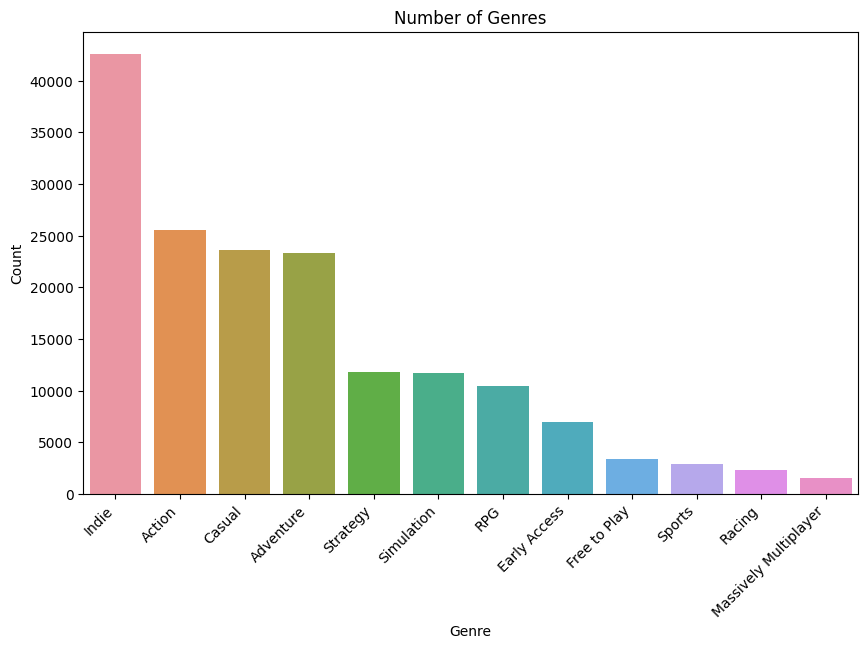

In [115]:

#graphing a count of the genres

sorted_a = dict(sorted(a.items(), key=lambda x: x[1], reverse=True))#sort the data first

genre_split_df = pd.DataFrame.from_dict(sorted_a, orient='index').reset_index() #create a dataframe

genre_split_df.columns = ['Genre', 'Count']


plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Count', data = genre_split_df)
plt.title('Number of Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

## Categories reivew

In [116]:
#'Categories'
games['Categories']

0        Single-player,Multi-player,Steam Achievements,...
1        Single-player,Steam Achievements,Full controll...
3                    Single-player,Full controller support
4                         Single-player,Steam Achievements
5        Single-player,Multi-player,MMO,PvP,Online PvP,...
                               ...                        
78570                                        Single-player
78571    Single-player,Steam Achievements,Full controll...
78578    Single-player,Steam Achievements,Partial Contr...
78579    Single-player,Steam Achievements,Full controll...
78580                                        Single-player
Name: Categories, Length: 58622, dtype: object

In [117]:
cat_list = []
for cats in games['Categories']:
  cat_list.append(cats.split(','))

In [120]:
cat_single = [] #list of each categories repeated
for cats in cat_list:
  for cat in cats:
    cat_single.append(cat)

In [124]:
#unique Categories
cat_unique = []
for cat in cat_single:
  if cat not in cat_unique:
    cat_unique.append(cat)

cat_unique

['Single-player',
 'Multi-player',
 'Steam Achievements',
 'Partial Controller Support',
 'Full controller support',
 'Steam Leaderboards',
 'Remote Play on Phone',
 'Remote Play on Tablet',
 'Remote Play on TV',
 'MMO',
 'PvP',
 'Online PvP',
 'Co-op',
 'Online Co-op',
 'In-App Purchases',
 'Steam Cloud',
 'Steam Trading Cards',
 'Shared/Split Screen',
 'Cross-Platform Multiplayer',
 'Remote Play Together',
 'Stats',
 'Shared/Split Screen PvP',
 'Captions available',
 'Steam Workshop',
 'Includes level editor',
 'LAN PvP',
 'LAN Co-op',
 'Shared/Split Screen Co-op',
 'Steam Turn Notifications',
 'VR Support',
 'SteamVR Collectibles',
 'Valve Anti-Cheat enabled',
 'Includes Source SDK',
 'Commentary available',
 'Mods',
 'Mods (require HL2)',
 'Tracked Controller Support',
 'VR Only',
 'VR Supported']

In [142]:
#list of all categroies repeated

cat_count = Counter(cat_single)

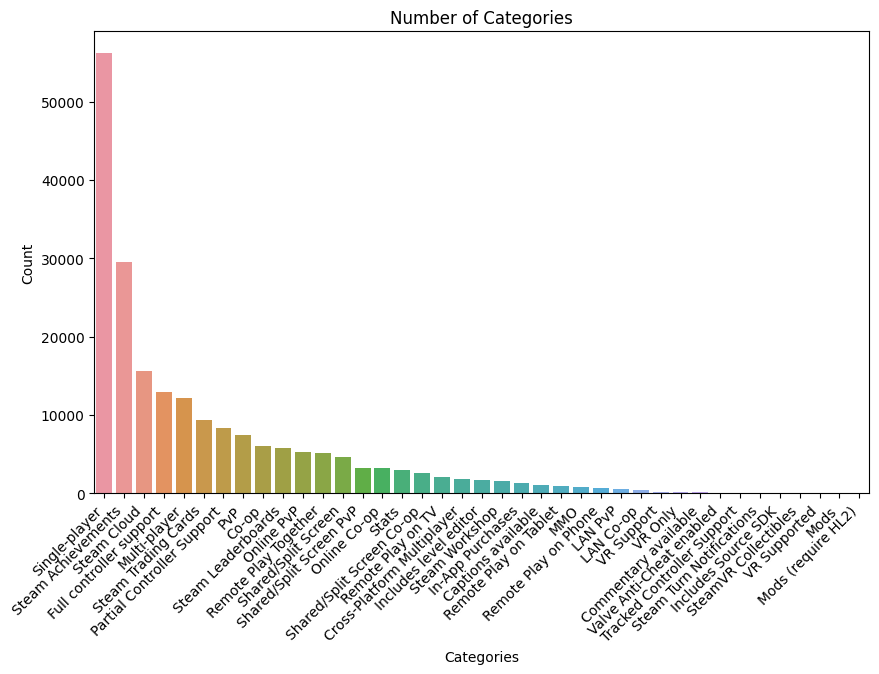

In [128]:

#graphing a count of the cat

sorted_cat = dict(sorted(cat_count.items(), key=lambda x: x[1], reverse=True))#sort the data first

cat_split_df = pd.DataFrame.from_dict(sorted_cat, orient='index').reset_index() #create a dataframe

cat_split_df.columns = ['Categories', 'Count']


plt.figure(figsize=(10, 6))
sns.barplot(x='Categories', y='Count', data = cat_split_df)
plt.title('Number of Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

## Tags

In [131]:
games['Tags']

0                              Indie,Casual,Sports,Bowling
1        Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...
3        2D Platformer,Atmospheric,Surreal,Mystery,Puzz...
4        Indie,Adventure,Nudity,Violent,Sexual Content,...
5        Turn-Based Combat,Massively Multiplayer,Multip...
                               ...                        
78570    Action,Automobile Sim,Racing,Fast-Paced,Compet...
78571    Exploration,Driving,3D,First-Person,Horror,Pos...
78578    Visual Novel,Horror,Psychedelic,Story Rich,Cho...
78579    Choose Your Own Adventure,Visual Novel,Comic B...
78580    Metroidvania,Side Scroller,Souls-like,Hack and...
Name: Tags, Length: 58622, dtype: object

In [132]:
tag_list =[]
for tags in games['Tags']:
  tag_list.append(tags.split(','))


In [137]:
tags_count =[]
for tags in tag_list:
  for tag in tags:
    tags_count.append(tag)

['Indie',
 'Casual',
 'Sports',
 'Bowling',
 'Indie',
 'Action',
 'Pixel Graphics',
 '2D',
 'Retro',
 'Arcade',
 'Score Attack',
 'Minimalist',
 'Comedy',
 'Singleplayer',
 'Fast-Paced',
 'Casual',
 'Funny',
 'Parody',
 'Difficult',
 'Gore',
 'Violent',
 'Western',
 'Controller',
 'Blood',
 '2D Platformer',
 'Atmospheric',
 'Surreal',
 'Mystery',
 'Puzzle',
 'Survival',
 'Adventure',
 'Linear',
 'Singleplayer',
 'Experimental',
 'Platformer',
 'Precision Platformer',
 'Puzzle-Platformer',
 '2D',
 'Stylized',
 'Physics',
 'Time Manipulation',
 'Casual',
 'Indie',
 'Indie',
 'Adventure',
 'Nudity',
 'Violent',
 'Sexual Content',
 'Story Rich',
 'Turn-Based Combat',
 'Massively Multiplayer',
 'Multiplayer',
 'RPG',
 'Tactical RPG',
 'Exploration',
 'PvP',
 'MMORPG',
 'Turn-Based Strategy',
 'God Game',
 'Strategy',
 '2.5D',
 'Magic',
 'Medieval',
 'Mythology',
 'Class-Based',
 'Turn-Based Tactics',
 'Singleplayer',
 'Online Co-Op',
 'Co-op',
 'Tower Defense',
 'Rogue-lite',
 'RTS',
 'Repl

In [138]:
# Unique Tags

tags_unique =[]

for tag in tags_count:
  if tag not in tags_unique:
    tags_unique.append(tag)

In [141]:
tags_unique

['Indie',
 'Casual',
 'Sports',
 'Bowling',
 'Action',
 'Pixel Graphics',
 '2D',
 'Retro',
 'Arcade',
 'Score Attack',
 'Minimalist',
 'Comedy',
 'Singleplayer',
 'Fast-Paced',
 'Funny',
 'Parody',
 'Difficult',
 'Gore',
 'Violent',
 'Western',
 'Controller',
 'Blood',
 '2D Platformer',
 'Atmospheric',
 'Surreal',
 'Mystery',
 'Puzzle',
 'Survival',
 'Adventure',
 'Linear',
 'Experimental',
 'Platformer',
 'Precision Platformer',
 'Puzzle-Platformer',
 'Stylized',
 'Physics',
 'Time Manipulation',
 'Nudity',
 'Sexual Content',
 'Story Rich',
 'Turn-Based Combat',
 'Massively Multiplayer',
 'Multiplayer',
 'RPG',
 'Tactical RPG',
 'Exploration',
 'PvP',
 'MMORPG',
 'Turn-Based Strategy',
 'God Game',
 'Strategy',
 '2.5D',
 'Magic',
 'Medieval',
 'Mythology',
 'Class-Based',
 'Turn-Based Tactics',
 'Online Co-Op',
 'Co-op',
 'Tower Defense',
 'Rogue-lite',
 'RTS',
 'Replay Value',
 'Perma Death',
 'Isometric',
 'Rogue-like',
 'Dynamic Narration',
 'Real Time Tactics',
 'Abstract',
 'Tact

In [146]:
#list of all tags repeated

tag = Counter(tag_count)

In [156]:
 tag.most_common(20)

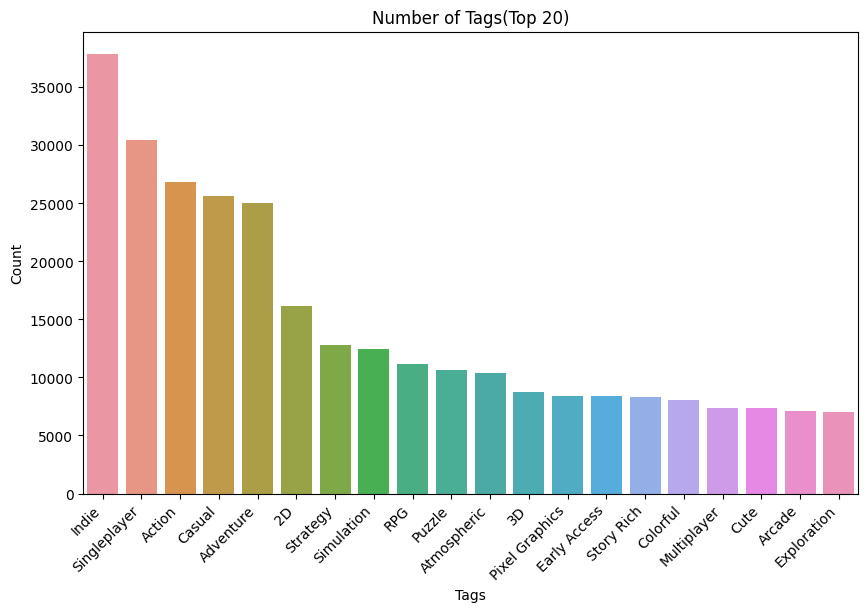

In [159]:
#graphing a count of the cat

sorted_tag = dict(sorted(tag.items(), key=lambda x: x[1], reverse=True))#sort the data first

tag_split_df = pd.DataFrame.from_dict(sorted_tag, orient='index').reset_index() #create a dataframe

tag_split_df.columns = ['Tags', 'Count']
tag20 = tag_split_df.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Tags', y='Count', data = tag20)
plt.title('Number of Tags(Top 20)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Seeing some preliminary correlation

In [42]:
games.corr()

<ipython-input-42-e97691e0a1c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  games.corr()


,AppID,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations
AppID,1.000000,-0.091692,-0.009036,-0.101474,-0.012691,-0.026508,0.006369,-0.195940,-0.150834,-0.283040,-0.012414,-0.049732,-0.038982,-0.044559,-0.051258
Estimated owners,-0.091692,1.000000,0.538208,0.100916,0.042902,0.024377,0.000910,0.038297,0.042627,0.179382,-0.002095,0.667166,0.641135,0.016884,0.534749
Peak CCU,-0.009036,0.538208,1.000000,0.037439,0.051473,0.009072,0.000366,0.006389,0.008566,0.058548,-0.000734,0.646584,0.589169,0.006511,0.519020
Required age,-0.101474,0.100916,0.037439,1.000000,0.130177,0.015293,-0.016455,-0.015788,-0.005244,0.208680,0.087085,0.073012,0.068315,0.002882,0.103843
Price,-0.012691,0.042902,0.051473,0.130177,1.000000,0.057978,-0.022171,-0.003953,-0.004197,0.185356,-0.002431,0.038427,0.031318,0.003519,0.056800
DLC count,-0.026508,0.024377,0.009072,0.015293,0.057978,1.000000,0.000550,0.014541,0.006534,0.023418,0.000380,0.018926,0.017138,0.032588,0.021674
Windows,0.006369,0.000910,0.000366,-0.016455,-0.022171,0.000550,1.000000,-0.017852,-0.005448,0.003348,0.000344,0.000570,0.000432,0.001167,0.000630
Mac,-0.195940,0.038297,0.006389,-0.015788,-0.003953,0.014541,-0.017852,1.000000,0.576164,0.110359,0.001347,0.025817,0.009659,0.002948,0.021482
Linux,-0.150834,0.042627,0.008566,-0.005244,-0.004197,0.006534,-0.005448,0.576164,1.000000,0.093796,0.006087,0.028899,0.011832,0.009654,0.024720
Metacritic score,-0.283040,0.179382,0.058548,0.208680,0.185356,0.023418,0.003348,0.110359,0.093796,1.000000,-0.003852,0.117431,0.078280,0.010503,0.121321


<ipython-input-43-0ab48b2cb55d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(games.corr().round(2), cmap='coolwarm')


<Axes: >

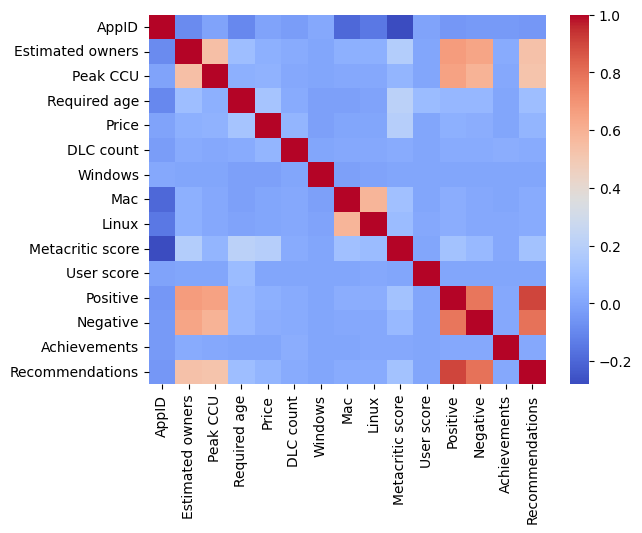

In [43]:
#initial look at heatmap
sns.heatmap(games.corr().round(2), cmap='coolwarm')

In [44]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59649 entries, 0 to 78580
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             59649 non-null  int64  
 1   Name              59649 non-null  object 
 2   Release date      59649 non-null  object 
 3   Estimated owners  59649 non-null  int64  
 4   Peak CCU          59649 non-null  int64  
 5   Required age      59649 non-null  int64  
 6   Price             59649 non-null  float64
 7   DLC count         59649 non-null  int64  
 8   Windows           59649 non-null  bool   
 9   Mac               59649 non-null  bool   
 10  Linux             59649 non-null  bool   
 11  Metacritic score  59649 non-null  int64  
 12  User score        59649 non-null  int64  
 13  Positive          59649 non-null  int64  
 14  Negative          59649 non-null  int64  
 15  Achievements      59649 non-null  int64  
 16  Recommendations   59649 non-null  int64 

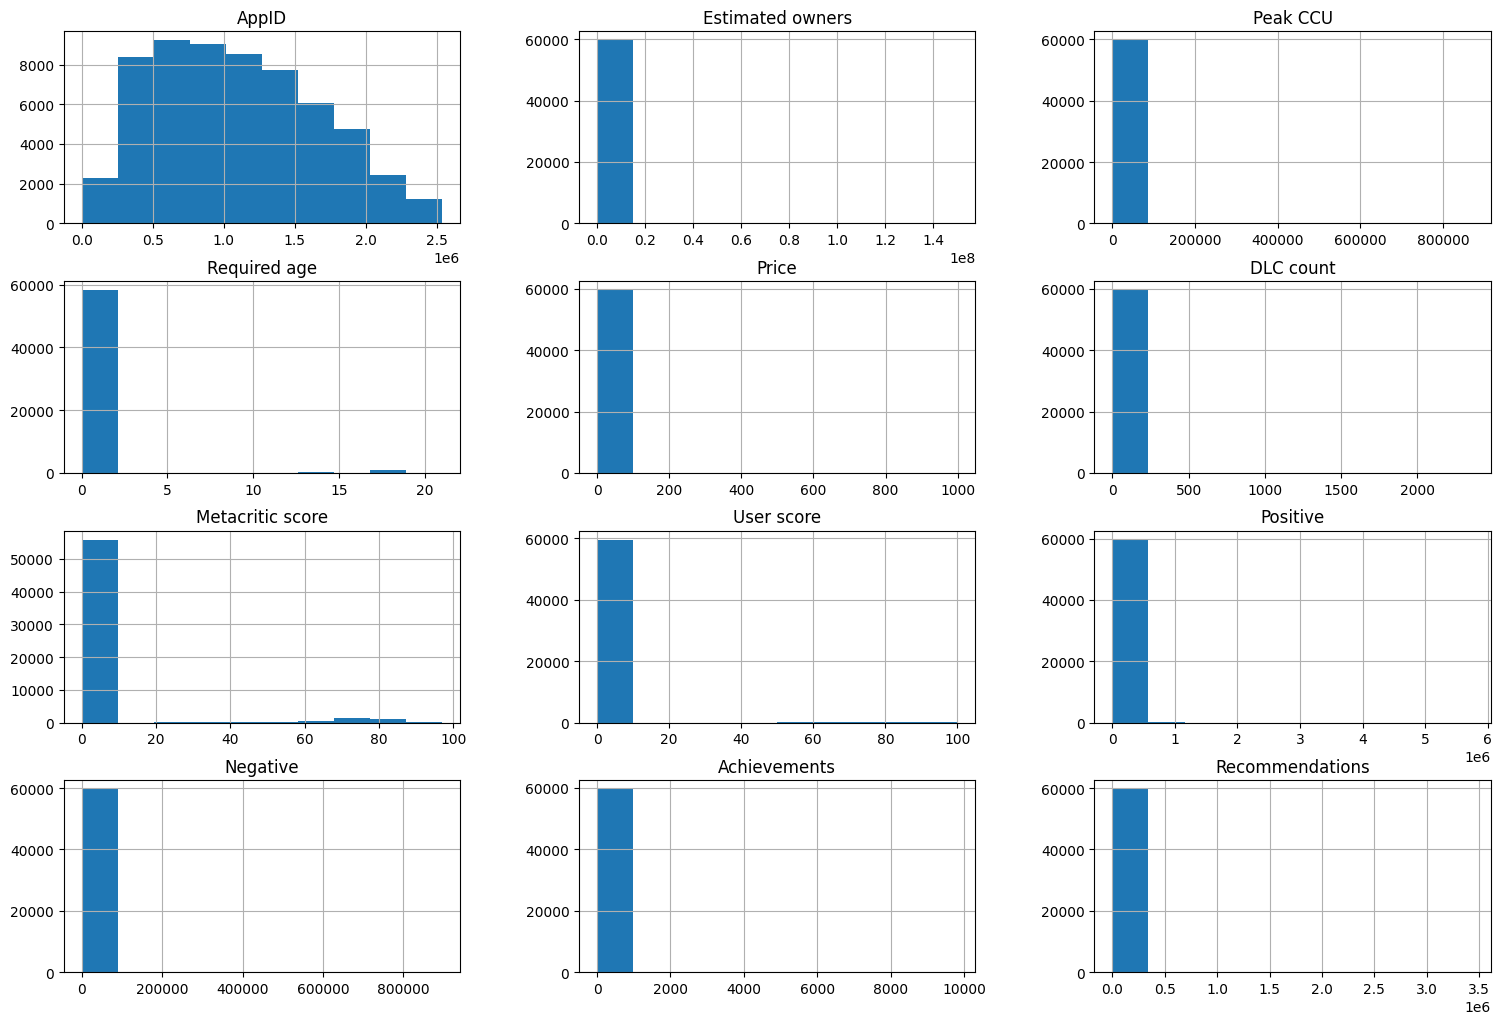

In [45]:
#histogram of numerical values
#define format for subplots (4 row and 4 columns)
fig, axis = plt.subplots(4, 3, figsize=(15, 10))
fig.tight_layout()

#create histogram for each column in DataFrame

games.hist(ax=axis);


## Removing non game by Genre

In [46]:
#code to remove check out genre
genre_count = {}
#check for nullss
for genre in games['Genres']:
  if isinstance(genre, str):
    genres = genre.split(",")
    for genre in genres:
      genre_count[genre] =genre_count.get(genre, 0) + 1

In [47]:
genre_count

{'Casual': 23861,
 'Indie': 43155,
 'Sports': 2861,
 'Action': 25969,
 'Adventure': 23660,
 'Free to Play': 3455,
 'Massively Multiplayer': 1533,
 'RPG': 10605,
 'Strategy': 11927,
 'Simulation': 11856,
 'Early Access': 7148,
 'Racing': 2316,
 'Sexual Content': 105,
 'Nudity': 116,
 'Violent': 512,
 'Gore': 304,
 'Animation & Modeling': 124,
 'Design & Illustration': 145,
 'Utilities': 242,
 'Game Development': 59,
 'Web Publishing': 38,
 'Audio Production': 59,
 'Video Production': 67,
 'Education': 96,
 'Software Training': 52,
 'Accounting': 7,
 'Photo Editing': 27,
 'Movie': 2,
 'Documentary': 1,
 'Episodic': 1,
 'Short': 1,
 'Tutorial': 1,
 '360 Video': 1}

Looking at Genre I'm going to remove everything that doesn't specifically describe a genre.
removing the following:

* 'Sexual Content': 105,
* 'Nudity': 116,
* 'Violent': 512,
* 'Gore': 304,
* 'Animation & Modeling': 125,
* 'Design & Illustration': 146,
* 'Utilities': 247,
* 'Game Development': 62,
* 'Web Publishing': 38,
* 'Audio Production': 60,
* 'Video Production': 68,
* 'Education': 97,
* 'Software Training': 52,
* 'Accounting': 7,
* 'Photo Editing': 29,
* 'Movie': 2,
* 'Documentary': 1,
* 'Episodic': 1,
* 'Short': 1,
* 'Tutorial': 1,
* '360 Video': 1}

In [48]:
values_to_remove = ['Sexual Content', 'Nudity','Violent','Gore', 'Animation & Modeling','Design & Illustration' , 'Utilities', 'Game Development', 'Web Publishing', 'Audio Production', 'Video Production', 'Education', 'Software Training', 'Accounting', 'Photo Editing', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']

In [49]:
#create a col call remove and mark that as true if its in the value to remove
games['Remove'] = games['Genres'].apply(lambda x: any([k in x for k in values_to_remove]))

In [50]:
games['Remove'].value_counts()

False    58622
True      1027
Name: Remove, dtype: int64

In [51]:
#code to remove base on true or false and moving to a new df
games = games[games['Remove'] == False]

In [52]:
games['Remove'].value_counts()

False    58622
Name: Remove, dtype: int64

In [53]:
#code to remove check out genre **need to run again
genre_count = {}
#check for nullss
for genre in games['Genres']:
  if isinstance(genre, str):
    genres = genre.split(",")
    for genre in genres:
      genre_count[genre] =genre_count.get(genre, 0) + 1

In [54]:
columns_to_add = list(genre_count.keys())

In [55]:
columns_to_add

['Casual',
 'Indie',
 'Sports',
 'Action',
 'Adventure',
 'Free to Play',
 'Massively Multiplayer',
 'RPG',
 'Strategy',
 'Simulation',
 'Early Access',
 'Racing']

## Function for Adding Columns

In [56]:
def add_columns(dataframe, column_names):
      for col_name in column_names:
        dataframe[col_name] = 0
      return dataframe

In [57]:
#add these col to the datafram for analysis

add_columns(games, columns_to_add)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Sports,Action,Adventure,Free to Play,Massively Multiplayer,RPG,Strategy,Simulation,Early Access,Racing
0,20200,Galactic Bowling,"Oct 21, 2008",10000,0,0,19.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
1,655370,Train Bandit,"Oct 12, 2017",10000,0,0,0.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
3,1355720,Henosis™,"Jul 23, 2020",10000,0,0,5.99,0,True,True,...,0,0,0,0,0,0,0,0,0,0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000,0,0,0.00,0,True,True,...,0,0,0,0,0,0,0,0,0,0
5,1469160,Wartune Reborn,"Feb 26, 2021",75000,68,0,0.00,0,True,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78570,1574990,Pushing the limit,"Aug 24, 2023",10000,0,0,5.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
78571,2371220,Sender,"Aug 15, 2023",10000,0,0,4.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
78578,2305970,Королевская ночь,"Aug 7, 2023",10000,5,0,2.99,0,True,False,...,0,0,0,0,0,0,0,0,0,0
78579,2103680,Mediterranea Inferno,"Aug 24, 2023",10000,2,0,14.99,1,True,True,...,0,0,0,0,0,0,0,0,0,0


##  Function to check for a value and add one to a specific column
### create a look for each of its tags and genre only

In [58]:
#Map out values for genres, categories and tags --> this one is ***Genre***, need one for tags, and categories.

val_to_check = [columns_to_add[0]]

def magic_genre(df):
    for index, i in enumerate(columns_to_add):
        #print(index)-
        val_to_check = [columns_to_add[index]]
        df[i] = df['Genres'].apply(lambda x: any([k in x for k in val_to_check])) #need to look at each category one at a time.
    return df


In [59]:
a = magic_genre(games)

In [60]:
a.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Windows,Mac,...,Sports,Action,Adventure,Free to Play,Massively Multiplayer,RPG,Strategy,Simulation,Early Access,Racing
0,20200,Galactic Bowling,"Oct 21, 2008",10000,0,0,19.99,0,True,False,...,True,False,False,False,False,False,False,False,False,False
1,655370,Train Bandit,"Oct 12, 2017",10000,0,0,0.99,0,True,True,...,False,True,False,False,False,False,False,False,False,False
3,1355720,Henosis™,"Jul 23, 2020",10000,0,0,5.99,0,True,True,...,False,False,True,False,False,False,False,False,False,False
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000,0,0,0.00,0,True,True,...,False,False,True,False,False,False,False,False,False,False
5,1469160,Wartune Reborn,"Feb 26, 2021",75000,68,0,0.00,0,True,False,...,False,False,True,True,True,True,True,False,False,False


In [61]:
test = a[['Estimated owners','Price','Casual','Indie','Sports','Action','Adventure','Free to Play','Massively Multiplayer','RPG','Strategy','Simulation','Early Access','Racing']]

<Axes: >

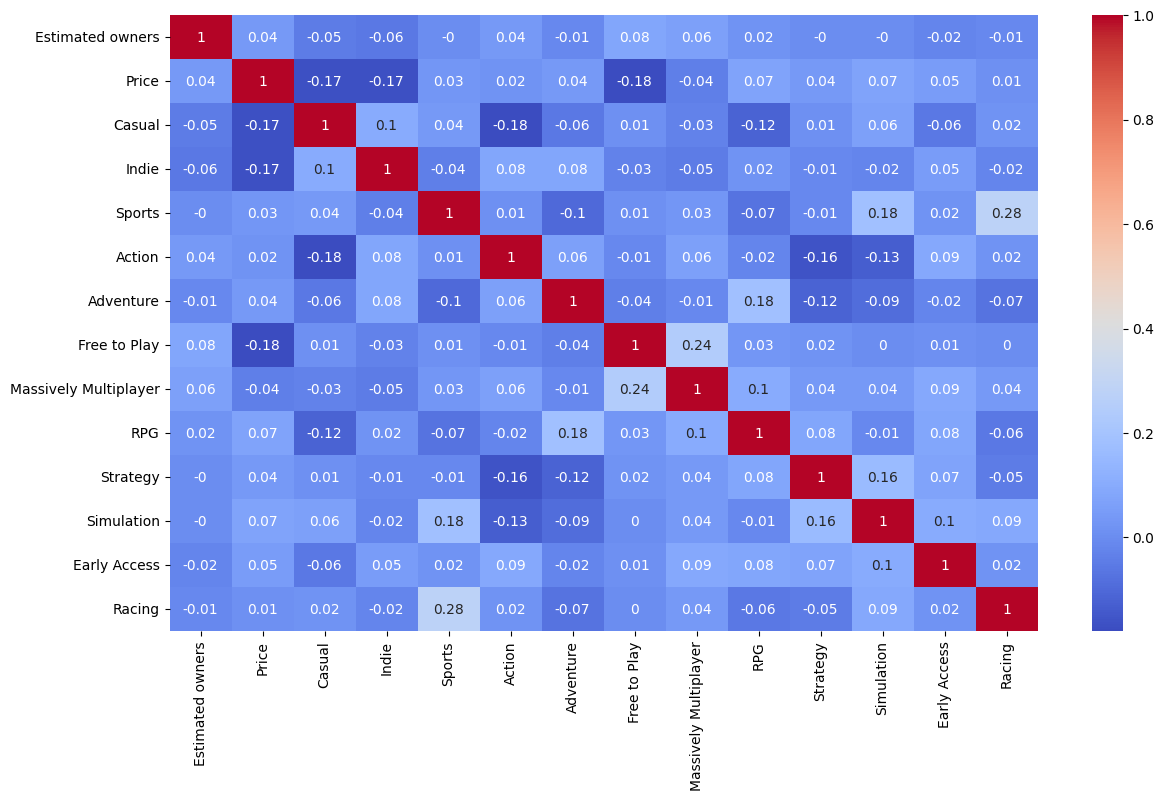

In [62]:
#initial look at heatmap
plt.figure(figsize=(14,8))
sns.heatmap(test.corr(method = 'pearson').round(2), cmap='coolwarm', annot=True)

<Axes: >

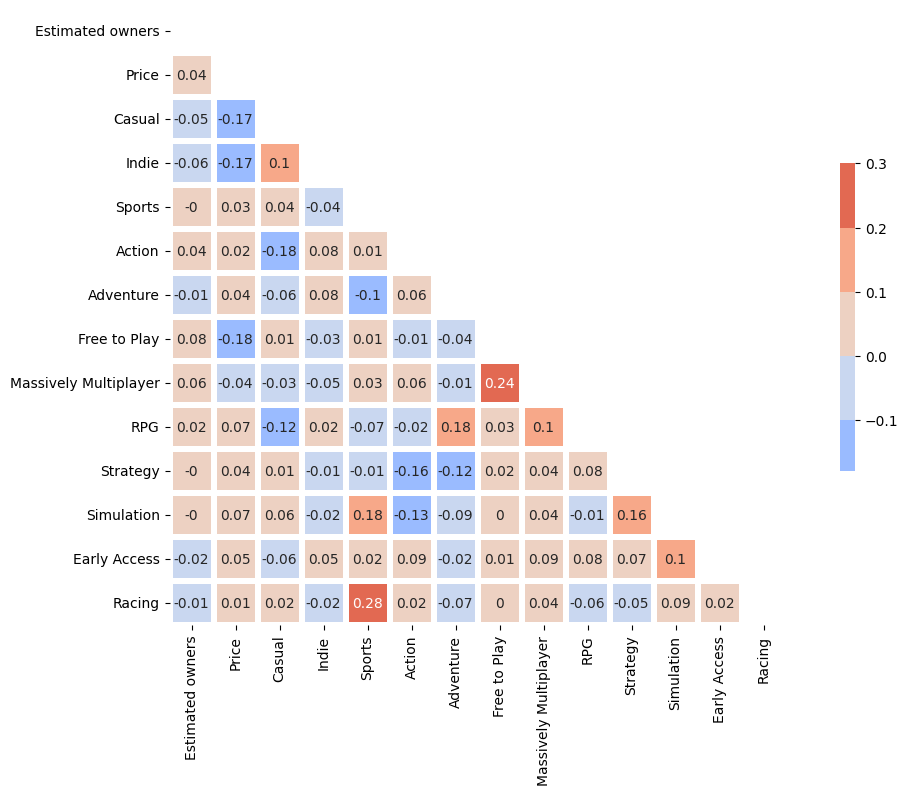

In [63]:
# sns.set_theme(style="white")
corr = test.corr().round(2)
mask = np.triu(test.corr())
f, ax = plt.subplots(figsize=(14, 8))
cmap = sns.color_palette("coolwarm")

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=3,
            cbar_kws={"shrink": .5},
            annot = True
           )

In [64]:
test['Indie'].value_counts()

True     42610
False    16012
Name: Indie, dtype: int64

<Axes: >

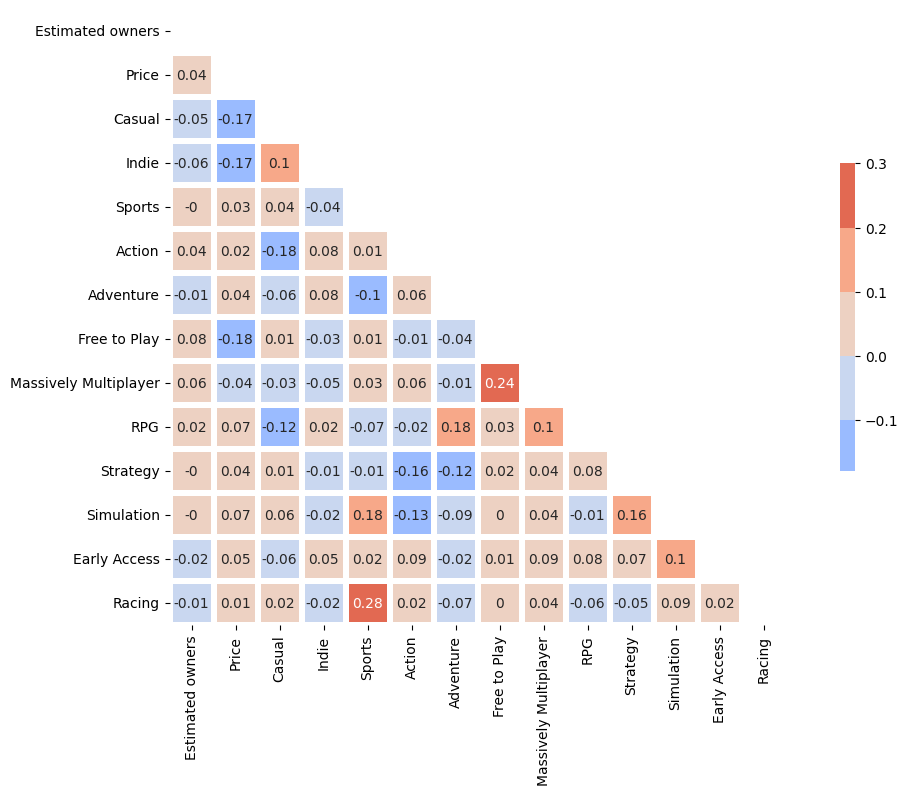

In [65]:
#is there a difference if i change it to integers?
# sns.set_theme(style="white")
corr = test.corr().round(2)
mask = np.triu(test.corr())
f, ax = plt.subplots(figsize=(14, 8))
cmap = sns.color_palette("coolwarm")

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=3,
            cbar_kws={"shrink": .5},
            annot = True
           )

In [66]:
#p value
correlation, p_value = pearsonr(test['Casual'], test['Estimated owners'])

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson correlation coefficient: -0.046093618598245574
P-value: 5.989882209567172e-29


In [181]:
# Calculate point-biserial correlation coefficient
result2 = pointbiserialr(test['Casual'], test['Estimated owners'])

# Print the result
print(f"Point-Biserial Correlation Coefficient: {result2.correlation}")
print(f"P-Value: {result2.pvalue}")

Point-Biserial Correlation Coefficient: -0.046093618598245574
P-Value: 5.989882209567172e-29


<ipython-input-67-f860a25b4120>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = a.corr().round(2)
<ipython-input-67-f860a25b4120>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(a.corr())


<Axes: >

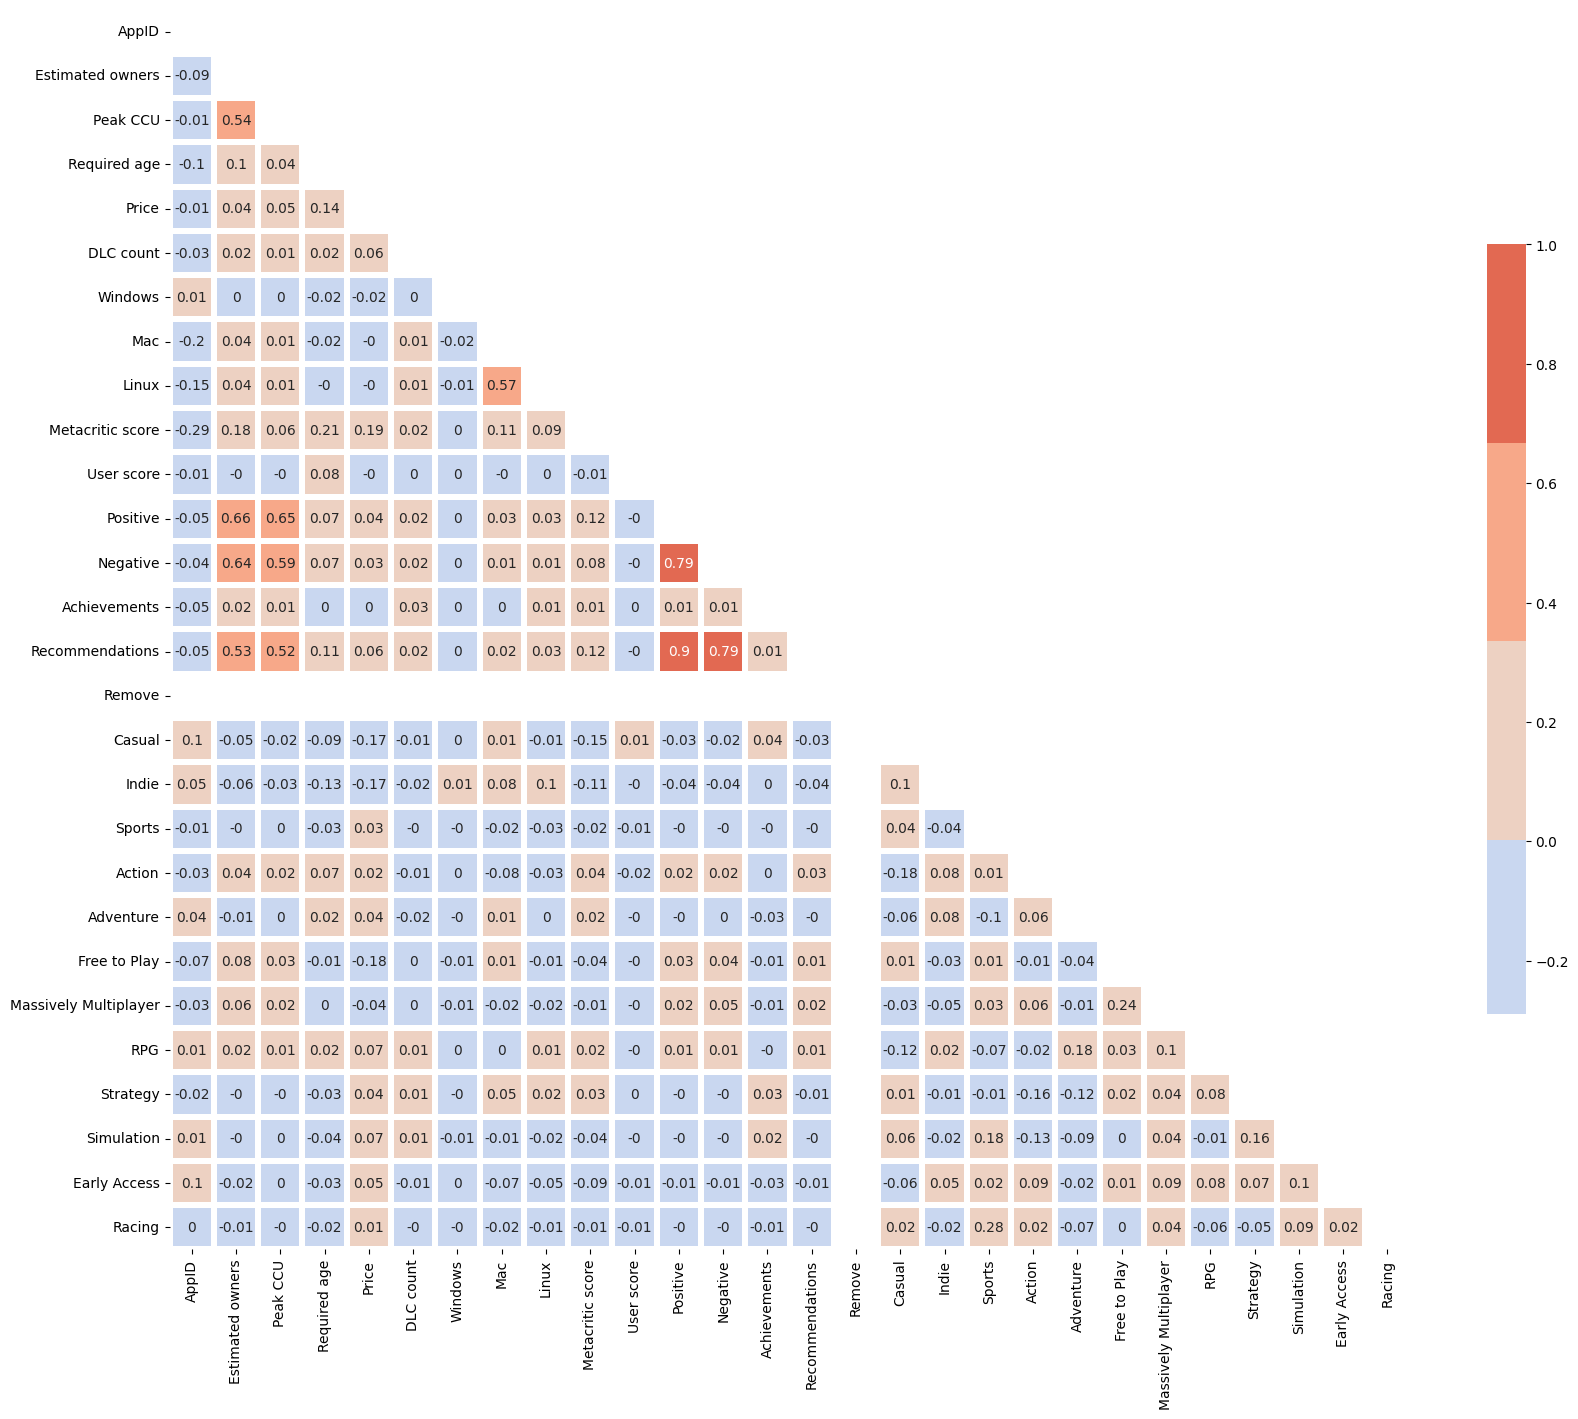

In [67]:
#is there a difference if i change it to integers?
# sns.set_theme(style="white")
corr = a.corr().round(2)
mask = np.triu(a.corr())
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("coolwarm")

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=1.0,
            center=0,
            square=True,
            linewidths=3,
            cbar_kws={"shrink": .5},
            annot = True
           )

## Function to help sort the dictionarys


In [68]:
#sorting dictionary
def sort_dict(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(50)) #changed to 50 to sort one thing
    return count_dict

## Tag Reviews

In [69]:
#looking at tags now.
tag_count = {}

#breakdown of Genres for games_test_clean_genre


for genre in games['Tags']:
      genres = genre.split(",")
      for genre in genres:
        tag_count[genre] = tag_count.get(genre, 0) + 1

In [70]:
tag_count

{'Indie': 37888,
 'Casual': 25621,
 'Sports': 3045,
 'Bowling': 36,
 'Action': 26788,
 'Pixel Graphics': 8434,
 '2D': 16123,
 'Retro': 5971,
 'Arcade': 7135,
 'Score Attack': 1723,
 'Minimalist': 3486,
 'Comedy': 3851,
 'Singleplayer': 30410,
 'Fast-Paced': 1589,
 'Funny': 6244,
 'Parody': 403,
 'Difficult': 5038,
 'Gore': 3051,
 'Violent': 3407,
 'Western': 246,
 'Controller': 3715,
 'Blood': 395,
 '2D Platformer': 3565,
 'Atmospheric': 10347,
 'Surreal': 1582,
 'Mystery': 3407,
 'Puzzle': 10644,
 'Survival': 4382,
 'Adventure': 25050,
 'Linear': 3054,
 'Experimental': 1079,
 'Platformer': 5944,
 'Precision Platformer': 1251,
 'Puzzle-Platformer': 2614,
 'Stylized': 3820,
 'Physics': 3438,
 'Time Manipulation': 388,
 'Nudity': 2422,
 'Sexual Content': 2492,
 'Story Rich': 8314,
 'Turn-Based Combat': 2004,
 'Massively Multiplayer': 1566,
 'Multiplayer': 7391,
 'RPG': 11164,
 'Tactical RPG': 858,
 'Exploration': 7053,
 'PvP': 3059,
 'MMORPG': 401,
 'Turn-Based Strategy': 2232,
 'God Gam

In [71]:
#Top 10 tags
top10_tags = sort_dict(tag_count)
top10_tags.most_common(10)

[('Indie', 37888),
 ('Singleplayer', 30410),
 ('Action', 26788),
 ('Casual', 25621),
 ('Adventure', 25050),
 ('2D', 16123),
 ('Strategy', 12794),
 ('Simulation', 12458),
 ('RPG', 11164),
 ('Puzzle', 10644)]

## Categories Review

In [72]:
cat_count = {}

#breakdown of Genres for games_test3

for genre in games['Categories']:
      genres = genre.split(",")
      for genre in genres:
        cat_count[genre] = cat_count.get(genre, 0) + 1

In [73]:
cat_count

{'Single-player': 56132,
 'Multi-player': 12129,
 'Steam Achievements': 29531,
 'Partial Controller Support': 8302,
 'Full controller support': 12997,
 'Steam Leaderboards': 5760,
 'Remote Play on Phone': 750,
 'Remote Play on Tablet': 905,
 'Remote Play on TV': 2039,
 'MMO': 823,
 'PvP': 7432,
 'Online PvP': 5252,
 'Co-op': 6056,
 'Online Co-op': 3260,
 'In-App Purchases': 1371,
 'Steam Cloud': 15577,
 'Steam Trading Cards': 9403,
 'Shared/Split Screen': 4618,
 'Cross-Platform Multiplayer': 1814,
 'Remote Play Together': 5134,
 'Stats': 3054,
 'Shared/Split Screen PvP': 3304,
 'Captions available': 1066,
 'Steam Workshop': 1607,
 'Includes level editor': 1662,
 'LAN PvP': 509,
 'LAN Co-op': 445,
 'Shared/Split Screen Co-op': 2641,
 'Steam Turn Notifications': 84,
 'VR Support': 230,
 'SteamVR Collectibles': 39,
 'Valve Anti-Cheat enabled': 124,
 'Includes Source SDK': 46,
 'Commentary available': 207,
 'Mods': 2,
 'Mods (require HL2)': 1,
 'Tracked Controller Support': 104,
 'VR Only'

In [74]:
#Top 10 Categories
top10_cats = sort_dict(cat_count)
top10_cats.most_common(10)

[('Single-player', 56132),
 ('Steam Achievements', 29531),
 ('Steam Cloud', 15577),
 ('Full controller support', 12997),
 ('Multi-player', 12129),
 ('Steam Trading Cards', 9403),
 ('Partial Controller Support', 8302),
 ('PvP', 7432),
 ('Co-op', 6056),
 ('Steam Leaderboards', 5760)]

In [75]:
#mergining the two list with the most common, no overlap.
#cat_tags = list(set(top24_cat + top25_tags))

## Function to add

In [76]:
#plotting Categories with data sorting
def plot_dict_bar(dictionary):

    #sort diction asceding
    sorted_dict = sorted(dictionary.items(), key=lambda x:x[1])
    converted_dict = dict(sorted_dict)

    count_dict = Counter(dict(sorted_dict))
    updated_dict = dict(count_dict.most_common(20))
    #
    keys = updated_dict.keys()
    values = updated_dict.values()

    plt.bar(keys, values)
    plt.xlabel('Keys', labelpad=10)
    plt.ylabel('Values')
    #adjust some layouts
    plt.xticks(rotation = 45, ha= 'right') #angles the columns labels for better readability
    plt.figure(figsize=(20,6))

    plt.show()

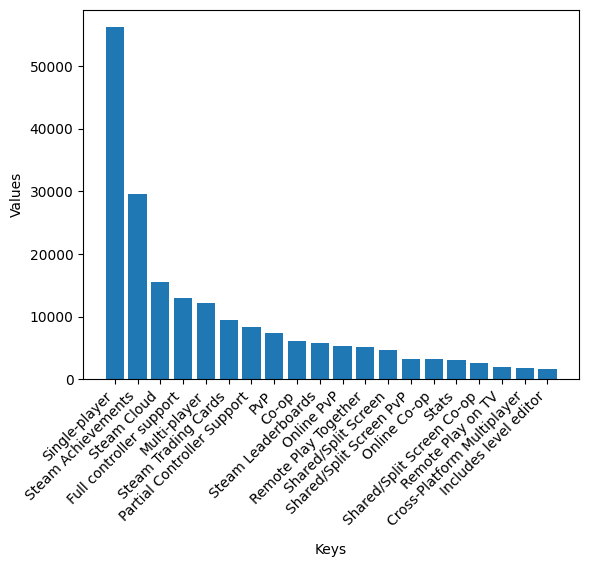

<Figure size 2000x600 with 0 Axes>

In [77]:
plot_dict_bar(top10_cats)